In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
data = pd.read_csv('../3-Data_Cleaning/movies_all.csv')

In [3]:
# 1.数据选择与清洗与分类

#选取制片公司存在且票房不为0的数据
data = data[(data['制片公司']!='暂无制片公司') & (data['票房']!=0)]

#正则表达式将制片公司英文去除
ProductionCompany_re = []
for i in data['制片公司']:
    try:
        ProductionCompany_re.append(re.search('[\u4E00-\u9FA5]+',i).group(0))
    except:
        ProductionCompany_re.append('其他制片公司')

#更新制片公司
data['制片公司'] = ProductionCompany_re    

#按制片公司分类
grouped = data.groupby(by='制片公司')

#将制片公司与相对应的总票房存入列表当中
ProductionCompany = []
BoxOffice = []
for i,j in grouped:
    ProductionCompany.append(i)
    BoxOffice.append(j['票房'].sum().round(1))

In [4]:
# 2.数据的拼接排序与选择

#拼接列表为Dataframe并按票房大小逆序排序
ProductionCompany_BoxOffice = pd.DataFrame({'制片公司':ProductionCompany,'票房':BoxOffice})
ProductionCompany_BoxOffice.sort_values(by='票房',ascending=False,inplace=True)

#取出总票房前10的发行公司与票房数据
ProductionCompany_ten = [i for i in ProductionCompany_BoxOffice['制片公司'].head(10)]
BoxOffice_ten = [i for i in ProductionCompany_BoxOffice['票房'].head(10)]

#查看数据
ProductionCompany_BoxOffice

,制片公司,票房
0,万达影视传媒有限公司,838925.4
124,华谊兄弟传媒股份有限公司,750508.1
101,北京登峰国际文化传播有限公司,567929.0
181,星辉海外有限公司,504803.8
164,成都可可豆动画影视有限公司,501334.6
51,北京京西文化旅游股份有限公司,472358.4
75,北京开心麻花影业有限公司,452201.8
175,星梦工场文化传媒,365078.9
170,新丽传媒股份有限公司,364691.0
56,北京光线影业有限公司,340163.4


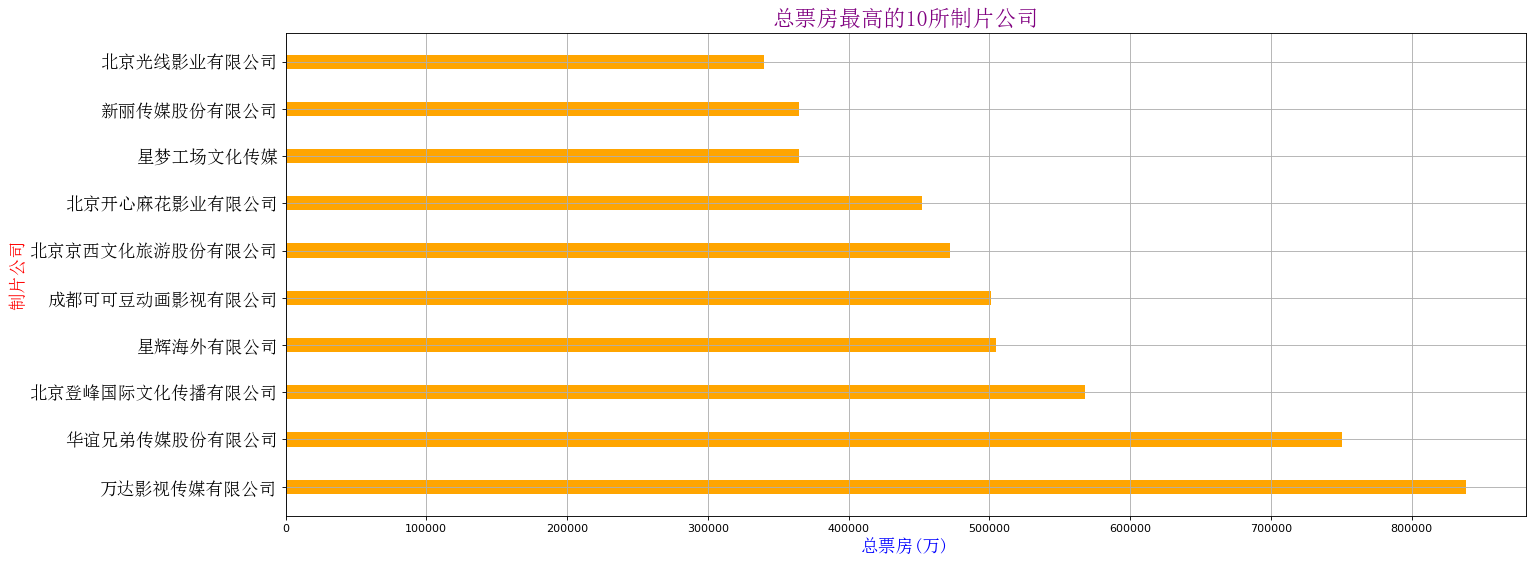

In [5]:
# 3.绘制图片

#设置图片大小
plt.figure(figsize=(20,8),dpi=80)

#设置字体
my_font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=16)
my_fonts = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=20)

#绘制图片
plt.barh(range(len(ProductionCompany_ten)),BoxOffice_ten,height=0.3,color="orange")

#设置y轴的刻度
plt.yticks(range(len(ProductionCompany_ten)),ProductionCompany_ten,fontproperties=my_font)

#添加描述信息
plt.xlabel("总票房(万)",fontproperties=my_font,color='blue')
plt.ylabel("制片公司",fontproperties=my_font,color='red')
plt.title("总票房最高的10所制片公司",fontproperties=my_fonts,color='purple')


#绘制表格
plt.grid()

#保存图片
plt.savefig("./总票房最高的10所制片公司.png") #保存为.svg格式矢量图，不会有失帧

#展示图片
plt.show()